## Download dataset

In [73]:
!pip3 install opendatasets --quiet

In [74]:
import opendatasets as od

In [75]:
dataset='https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset'

In [76]:
od.download(dataset)

Skipping, found downloaded files in "./fake-and-real-news-dataset" (use force=True to force download)


In [77]:
import os
data_dir='fake-and-real-news-dataset/'

In [78]:

os.listdir(data_dir)

['True.csv', 'Fake.csv']

## Preprocessing the data

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
fake_df=pd.read_csv('fake-and-real-news-dataset/Fake.csv')
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [81]:

true_df=pd.read_csv('fake-and-real-news-dataset/True.csv')
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [82]:
true_df['category']=1
fake_df['category']=0

#### Concat the fake and real data

In [83]:
raw_df=pd.concat([true_df,fake_df],ignore_index=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


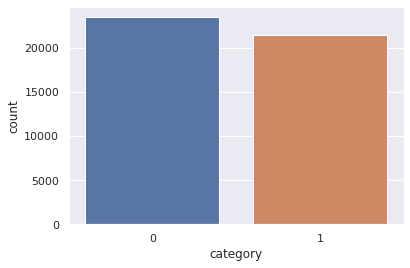

In [84]:
sns.set_style("darkgrid")
sns.countplot(raw_df.category)

In [85]:
raw_df

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [86]:
raw_df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [87]:
raw_df.title.count()

44898

In [88]:
raw_df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

[Text(0, 0, 'politicsNews'),
 Text(0, 0, 'worldnews'),
 Text(0, 0, 'News'),
 Text(0, 0, 'politics'),
 Text(0, 0, 'Government News'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'US_News'),
 Text(0, 0, 'Middle-east')]

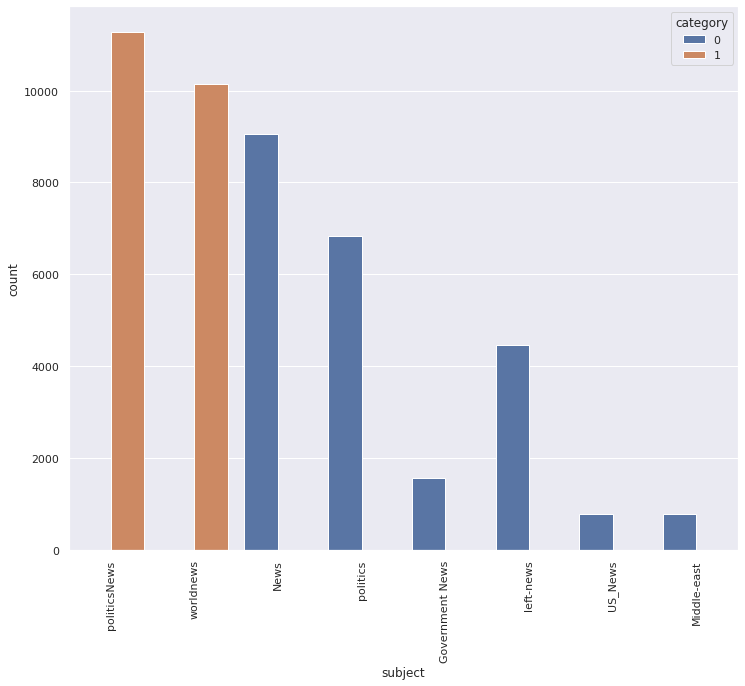

In [89]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
chart=sns.countplot(x="subject",hue="category",data=raw_df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [90]:

raw_df["text"]=raw_df["text"] + " " +raw_df["title"]

In [91]:
del raw_df['title']
del raw_df['subject']
del raw_df['date']

In [92]:

raw_df.head()

,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


## Data Cleaning

In [93]:
import nltk
from bs4 import BeautifulSoup
import re,string,unicodedata
from string import punctuation
from nltk.corpus import stopwords
from wordcloud import STOPWORDS,WordCloud

In [94]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
stop=set(stopwords.words('english'))
punctuation=list(string.punctuation)
stop.update(punctuation)

In [96]:
def remove_strip_html(text):
  soup=BeautifulSoup(text,"html.parser")
  return soup.get_text()

#Removing brackets
def remove_brackets(text):
  return re.sub('\[[^]]','',text)

#Removig urls
def remove_urls(text):
  return re.sub(r'http\S+','',text)

#Remove stopwords
def remove_stopwords(text):
  final_text=[]
  for i in text.split():
    if i.strip().lower() not in stop:
      final_text.append(i.strip())
  return "".join(text)

# CLeaning
def clean(text):
  text=remove_strip_html(text)
  text=remove_brackets(text)
  text=remove_urls(text)
  text=remove_stopwords(text)
  return text





In [97]:

# apply in dataframe
raw_df['text']=raw_df['text'].apply(clean)

In [98]:
raw_df['text'][66]

"ATLANTA (Reuters) - The two Democratic candidates running for governor in Georgia are both lawyers and former state legislators. Both are women, and on many policy issues it’s hard to tell them apart. Both even share the same first name - Stacey. But they sharply disagree on the path to victory.\xa0\xa0  Stacey Abrams, 44, wants to become the first African American female governor in the United States by mobilizing solidly Democratic black voters, who vote sporadically in elections, to form a winning coalition with white liberals. Stacey Evans, 39, thinks the math does not add up without\xa0also appealing to white moderates, many of them outside urban areas, who voted for President Donald Trump last November. She is highlighting her crossover appeal as a white suburban mother with country roots. Their divergent strategies mirror a wider debate within the Democratic Party that has grown louder after strong turnout by minority voters helped to power recent Democratic victories in Alabam

#### Wordcloud for Real text

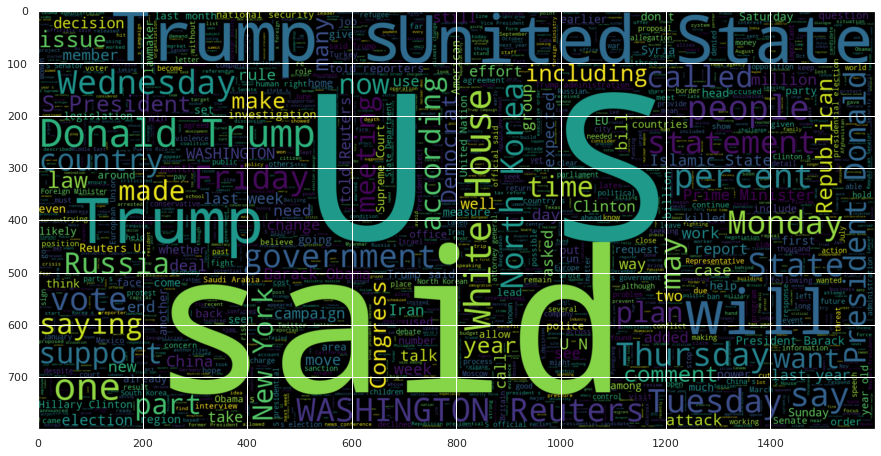

In [99]:
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000,width=1600,height=800,
             stopwords=STOPWORDS).generate(" ".join(raw_df[raw_df.category==1].text))
plt.imshow(wc,interpolation='bilinear')
      

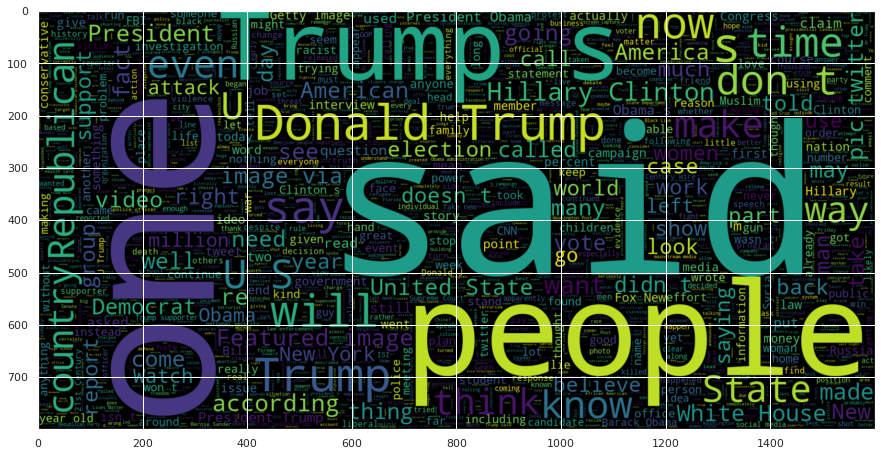

In [100]:
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000,width=1600,height=800,
             stopwords=STOPWORDS).generate(" ".join(raw_df[raw_df.category==0].text))
plt.imshow(wc,interpolation='bilinear')
      

In [101]:
raw_df['text'].values[0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

## Creating Vocabulary

In [102]:
from torchtext.data.utils import get_tokenizer

In [103]:
tokenizer=get_tokenizer('basic_english')

In [104]:
raw_df['text']= raw_df['text'].apply(lambda x:x.lower())

In [105]:
sample_text=raw_df['text'].values[0]

In [106]:
sample_text_tokens = tokenizer(sample_text)


In [107]:
sample_text_tokens[:10]

['washington',
 '(',
 'reuters',
 ')',
 '-',
 'the',
 'head',
 'of',
 'a',
 'conservative']

In [108]:
from torchtext.vocab import build_vocab_from_iterator

In [109]:
text_tokens=raw_df.text.map(tokenizer)

In [110]:
text_tokens[0][:20]

['washington',
 '(',
 'reuters',
 ')',
 '-',
 'the',
 'head',
 'of',
 'a',
 'conservative',
 'republican',
 'faction',
 'in',
 'the',
 'u',
 '.',
 's',
 '.',
 'congress',
 ',']

In [111]:

VOCAB_SIZE=2000

In [112]:
unk_token='<unk>'
pad_token='<pad>'

In [113]:
vocab=build_vocab_from_iterator(text_tokens,
                                specials=[unk_token,pad_token],
                                max_tokens=VOCAB_SIZE)

In [114]:
vocab[unk_token]

0

In [115]:
vocab.set_default_index(vocab[unk_token])

In [116]:
vocab['congress']

204

In [117]:
target_col=['category']

In [118]:
sample_indices=vocab.lookup_indices(sample_text_tokens)

In [119]:
sample_indices[:10]

[117, 30, 76, 29, 68, 2, 437, 6, 7, 319]

In [120]:
sample_text_recovered=vocab.lookup_tokens(sample_indices)


In [121]:
sample_text_recovered[:10]

['washington',
 '(',
 'reuters',
 ')',
 '-',
 'the',
 'head',
 'of',
 'a',
 'conservative']

## Creating Training and Validation sets

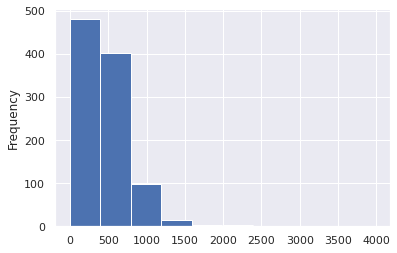

In [122]:
raw_df.text.sample(1000).map(tokenizer).map(len).plot(kind='hist')

In [123]:
# raw_df.text.map(tokenizer).map(len).plot(kind='hist')

In [124]:
raw_df.text.map(tokenizer).map(len).values

array([ 881,  713,  524, ..., 4660,  534, 1044])

In [125]:
MAX_LENGTH=300

In [126]:
def pad_tokens(tokens):
  if(len(tokens)>=MAX_LENGTH):
    return tokens[:MAX_LENGTH]
  else:
    return tokens + [pad_tokens]*(MAX_LENGTH - len(tokens))

In [127]:
import torch
from torch.utils.data import Dataset

In [128]:
class FakenRealDataset(Dataset):
  def __init__(self,df,is_test=False):
    self.df=df
    self.is_test=is_test

  def __getitem__(self,index):
    text=self.df.text.values[index]
    text_tokens=pad_tokens(tokenizer(text))
    input=torch.tensor(vocab.lookup_indices(text_tokens))
    if self.is_test:
      target=torch.tensor([0]).float()
    else:
      target=torch.tensor(self.df[target_col].values[index]).float()
    return input,target

  def __len__(self):
    return len(self.df)

In [129]:
raw_ds=FakenRealDataset(raw_df)

In [130]:
raw_df.head()


,text,category
0,washington (reuters) - the head of a conservat...,1
1,washington (reuters) - transgender people will...,1
2,washington (reuters) - the special counsel inv...,1
3,washington (reuters) - trump campaign adviser ...,1
4,seattle/washington (reuters) - president donal...,1


In [131]:
from torch.utils.data import random_split

In [132]:
VAL_FRAC=0.15

In [133]:
train_ds,test_ds=random_split(raw_ds,[1-VAL_FRAC,VAL_FRAC])

In [134]:
len(train_ds),len(test_ds)

(38164, 6734)

In [141]:
test_ds[0]

(tensor([ 229,  544,  368,    4,    2,  173,   10,  128,  346,   14,    7,  771,
          173,   54, 1304, 1168,  173,   24,    0,    7,    0,    6,    0,    0,
            5, 1207,    9,    2,    0,   80,  998,   23,  444,    7,    0,  123,
           80,  135, 1908,    3,    0,    4,   31,    0,  173,   24,  106,  362,
           35,    0, 1458,    9,   45,  507,   96, 1947,    4,    0,    4, 1818,
          138,  742,  653,    3,  110, 1878,    0,    0,    0,    4,    2,  114,
         1029,    0,    0,    4,  937,    2,    0,  960,   13,    0,  771,   64,
           15, 1200,    5,  710,   13,   80,  135, 1908, 1732,    5,    2,  692,
            6,    2,    0,    0,    3,    0,  279,   22,    0,    6,    0,   13,
           80,  998,    5,  249,   22,    0,   13,   80,  138,  742,    3,    0,
           20,   27,    0,   23,    0,    8,  125,   27, 1786,  209, 1259,    5,
         1164,    9,    2,    0,    3,   15,   14,  106,    2,  586,    6,    7,
         1140,    0,    4,  

## Creating pytorch dataloader


In [136]:
from torch.utils.data import DataLoader

In [137]:
BATCH_SIZE=256

In [138]:
train_dl=DataLoader(train_ds,batch_size=BATCH_SIZE,shuffle=True,num_workers=8,pin_memory=True)
test_dl=DataLoader(test_ds,batch_size=BATCH_SIZE*2,num_workers=8,pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [143]:
# for batch in train_dl:
#   b_inputs,b_targets=batch
#   print('b_inputs.shape',b_inputs.shape)
#   print('b_targets.shape',b_targets.shape)